1. Business question:
Payment defaults are detrimental to the business and are a significant cost factor.
Are there any key trends in the data which can help me avoid default-prone customers in the future?

Feel free to process and explore the data in any tool. Please do the analysis in a dashboarding tool of your choice.

#### Imports:

In [1]:
# Data import and processing
import pandas as pd
import numpy as np

# Data viz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Methods:

In [2]:
# Calculate reliability of Client. Where 1 will be super reliable (never missed a payment), and 0 a client that never paid.
def GetReliability(aux):
    try:
        payment_times = aux.PAYMENT
    except:
        payment_times = 0

    try:
        default_times = aux.DEFAULT
    except:
        default_times = 0

    return(payment_times/(payment_times+default_times))

#### Load data:

In [3]:
# Load Clients dataFrame:
clients = pd.read_csv('Database/Clients.csv')

# Load Payments dataFrame:
payments = pd.read_csv('Database/Payments.csv')

#### Understand Clients DF:

In [4]:
# Overview of the data:
clients

,client_id,entity_type,entity_year_established
0,786,Australian Private Company,2002
1,230,Australian Private Company,2008
2,282,Individual/Sole Trader,2001
3,447,Australian Private Company,2013
4,310,Individual/Sole Trader,2015
...,...,...,...
1282,815,Australian Private Company,2012
1283,201,Australian Private Company,2009
1284,492,Australian Private Company,2007
1285,765,Australian Private Company,2014


In [5]:
# Check if column names have ' ' at the end or beginning of name
clients.columns
# Ans: No, they dont.

Index(['client_id', 'entity_type', 'entity_year_established'], dtype='object')

In [6]:
# Date range:
print('Date Range:')
print('Min: {} - Max: {}'.format(min(clients.entity_year_established), max(clients.entity_year_established)))

Date Range:
Min: 1999 - Max: 2018


In [7]:
# Unique entity_type
print('Unique entity_types:')
pd.unique(clients.entity_type)

Unique entity_types:


array(['Australian Private Company', 'Individual/Sole Trader',
       'Family Partnership', 'Australian Proprietary Company',
       'Discretionary Trading Trust', 'Discretionary Investment Trust',
       'Australian Public Company', 'Other Partnership',
       'Fixed Unit Trust', 'Hybrid Trust'], dtype=object)

In [8]:
# Duplicates?
print('What is the length of Clients dataframe? Ans: {}'.format(len(clients)))
print('What is the length of Clients dataframe without client_id duplicates? Ans: {}'.format(len(clients.drop_duplicates(subset='client_id',keep='first'))))
# Ans: Yes, there are duplicates.

What is the length of Clients dataframe? Ans: 1287
What is the length of Clients dataframe without client_id duplicates? Ans: 1281


In [9]:
print('What is happening with duplicated clients?')
# Question:
# Are client_id being updated with new entity types? Or, are they entry errors in the system? 

display(clients[clients.duplicated(subset='client_id',keep=False)].sort_values(['client_id','entity_year_established']))

# Ans: Considering client_id 591 and 1262 contain multiple entries with the same entity_type, it would be logical to say that these entries are errors in the system. However, it could still be an update in the system.

What is happening with duplicated clients?


,client_id,entity_type,entity_year_established
1115,165,Individual/Sole Trader,2006
401,165,Australian Private Company,2015
350,473,Individual/Sole Trader,2008
332,473,Australian Private Company,2016
306,591,Australian Private Company,2007
245,591,Australian Private Company,2013
816,591,Australian Private Company,2015
1275,797,Australian Private Company,2002
1063,797,Discretionary Investment Trust,2016
1172,1262,Australian Private Company,2005


In [10]:
# Sort data by date and id:

clients = clients.sort_values(['entity_year_established','client_id']).reset_index(drop=True)

########### COMMENT IF HYPOTHESIS 1 IS WRONG ####################
# Hypothesis 1 - Duplicated entries are errors in the system: # #
# Solution: delete newer entries and keep first:              # #
cleanedClients = clients[~clients['client_id'].duplicated()]  # #
print('The chosen Hypothesis was 1 - delete newer entries and keep first of duplicated entries')
############################################################### #


# ########### COMMENT IF HYPOTHESIS 2 IS WRONG ####################
# # Hypothesis 2 - Duplicated entries are updates in the system:
# # Solution: keep oldest date, newest entity_type
# cleanedClients = clients[~clients['client_id'].duplicated()]  
# newest_entityType = clients[clients.duplicated(subset='client_id',keep=False)].sort_values(['client_id','entity_year_established']).reset_index(drop=True).drop_duplicates(subset='client_id',keep='last')[['client_id','entity_type']].reset_index(drop=True)

# # Correct values of newest entity_type:
# for i in range(len(newest_entityType)):
#     cleanedClients.at[cleanedClients.loc[cleanedClients['client_id'] == newest_entityType.client_id[i]].index[0], 'entity_type'] = newest_entityType.entity_type[i]
# print('The chosen Hypothesis was 2 - keep oldest date, newest entity_type of duplicated entries')
# #################################################################

The chosen Hypothesis was 1 - delete newer entries and keep first of duplicated entries


#### Understand Payments DF:

In [11]:
# Payments df overview:
payments

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code
0,20175,927,1,1527012511,66.66,PAYMENT
1,8485,927,1,1511716095,66.66,PAYMENT
2,13778,927,1,1519319303,66.66,PAYMENT
3,22768,927,1,1529863724,66.66,PAYMENT
4,15698,927,1,1521738504,66.66,PAYMENT
...,...,...,...,...,...,...
25554,25075,1603,1280,1532023764,1666.68,PAYMENT
25555,24711,1603,1280,1531764560,0.01,PAYMENT
25556,25076,1603,1280,1532023764,64.99,PAYMENT
25557,25132,1627,1281,1532282886,0.01,PAYMENT


In [12]:
# Basic questions regarding payments df:

# Check if column names have ' ' at the end or beginning of name
print('Check column names:')
print(payments.columns)
# Ans: No, they dont.

print('\n\nCheck unique values for payment codes:')
print(pd.unique(payments.payment_code))
# Ans: Only PAYMENT and DEFAULT(no payment)

print('\n\nCheck for NaN:')
print('Length of payments complete: {} - Length of payments with NaN dropped: {}'.format(len(payments),len(payments.dropna())))
# Ans: No need for further processing, no NaN

print('\n\nDo we have duplicated transaction_id?')
display(payments[payments.duplicated(subset='transaction_id',keep=False)])
# Ans: No duplicated entries for unique identifier

Check column names:
Index(['transaction_id', 'contract_id', 'client_id', 'transaction_date',
       'payment_amt', 'payment_code'],
      dtype='object')


Check unique values for payment codes:
['PAYMENT' 'DEFAULT']


Check for NaN:
Length of payments complete: 25559 - Length of payments with NaN dropped: 25559


Do we have duplicated transaction_id?


,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code


In [13]:
# Date processing:

# Convert date from epoch format:
# Suposing Cecil being a multinational company, the data would be in UTC:
payments['transaction_date_ISO'] = pd.to_datetime(payments['transaction_date'],unit = 's')
# Create year, month, and day columns:
payments['year'] = payments['transaction_date_ISO'].dt.year
payments['month'] = payments['transaction_date_ISO'].dt.month
payments['month_name'] = payments['transaction_date_ISO'].dt.month_name()
payments['day'] = payments['transaction_date_ISO'].dt.day
payments['weekday'] = payments['transaction_date_ISO'].dt.weekday
payments['weekday_name'] = payments['transaction_date_ISO'].dt.day_name()
print('Added date converted to UTC')
# Check Date ranges:
print('\nDate Range (UTC):')
print('Min: {} - Max: {}'.format(min(payments.transaction_date_ISO), max(payments.transaction_date_ISO)))
# Ans: We have roughly a year worth of payment data



print('\n######')

# However there is a chance that we need to convert the data to Australian (i.e. Sydney) timezone (ps: includes daylight saving time changes):
payments['transaction_date_ISO_AU'] = pd.to_datetime(payments['transaction_date'],unit = 's').dt.tz_localize('UTC').dt.tz_convert('Australia/Sydney')
payments['transaction_date_ISO_AU'] = payments['transaction_date_ISO_AU'].dt.strftime('%Y-%m-%d %H:%M:%S')
print('\nAdded date converted to Sydney timezone')

print('\nDate Range (SYD):')
print('Min: {} - Max: {}'.format(min(payments.transaction_date_ISO_AU), max(payments.transaction_date_ISO_AU)))
# Ans: We have roughly a year worth of payment data

Added date converted to UTC

Date Range (UTC):
Min: 2017-07-02 18:08:02 - Max: 2018-07-24 18:08:10

######

Added date converted to Sydney timezone

Date Range (SYD):
Min: 2017-07-03 04:08:02 - Max: 2018-07-25 04:08:10


In [14]:
# Check number of payments vs defaults:
payments['payment_code'].value_counts()
# Ans: Roughly 91.13% of sales have been paid

PAYMENT    23340
DEFAULT     2219
Name: payment_code, dtype: int64

In [15]:
# Do we have any clients that have not done any payments?
print('How many clients we have lost from before 2017?')
print(len(pd.unique(payments.loc[~payments['client_id'].isin(cleanedClients['client_id'])]['client_id'])))
# Ans NO clients stopped engaging with the company
# That means that a single merged database would suffice the whole analysis


How many clients we have lost from before 2017?
0


#### Merge clients + payments:

In [16]:
merged = payments.merge(cleanedClients, on='client_id',how='left')

In [17]:
# Check merging file:
print('Duplicated transaction_id:')
display(merged[merged['transaction_id'].duplicated()])
# Ans: empty, showing we can proceed

Duplicated transaction_id:


,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,transaction_date_ISO,year,month,month_name,day,weekday,weekday_name,transaction_date_ISO_AU,entity_type,entity_year_established


In [18]:
# Create reliability of client based on payment vs default:

# Calculate reliability for each client:
clients = pd.unique(merged.client_id)
reliability=[]

for client in clients:
    aux = merged.loc[merged['client_id'] == client].payment_code.value_counts()

    reliability.append(GetReliability(aux))

# Create dataFrame to flag reliability of clients
client_reliability_df = pd.DataFrame({'client_id':clients,'client_reliability':reliability})

# Create a method to apply reliability labelling
def reliability_label(value):
    if value == 1:
        return 'perfectClient'
    else:
        return 'detrimentalClient'

# Apply the function to create the new column
client_reliability_df['client_reliability_label'] = client_reliability_df['client_reliability'].apply(reliability_label)

# Add reliability to merged dataFrame:
merged = merged.merge(client_reliability_df,on='client_id',how='left')


In [19]:
merged['yearMonth'] =  merged['year'].astype(str) + '-' + merged['month'].astype(str)

In [20]:
merged['count']=1

In [21]:
merged = merged.sort_values(['client_id','transaction_date']).reset_index(drop=True)

### Data Exploration:

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/1309697058.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(data=merged.groupby(['client_id','payment_code','year']).sum().reset_index()[::-1],x='year',y='payment_amt',hue='payment_code',capsize=0.05,dodge=True,kind='bar')


Text(49.23499652777777, 0.5, 'Average paid amount per client')

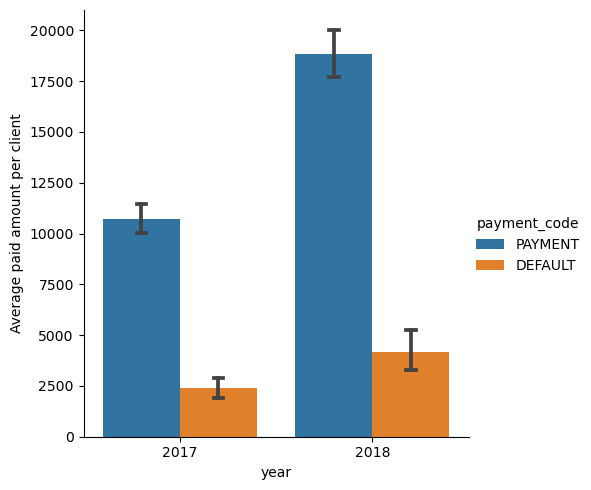

In [22]:
# How much money are clients paying vs not paying per year?
# Include all possible outliers:
sns.catplot(data=merged.groupby(['client_id','payment_code','year']).sum().reset_index()[::-1],x='year',y='payment_amt',hue='payment_code',capsize=0.05,dodge=True,kind='bar')
plt.ylabel('Average paid amount per client')

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/2356298757.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(data=merged.groupby(['client_id','client_reliability_label','payment_code']).sum().reset_index()[::-1],x='payment_code',y='payment_amt',hue='client_reliability_label',capsize=0.05,dodge=True,kind='bar')


Text(59.407902777777764, 0.5, 'Average paid amount per client')

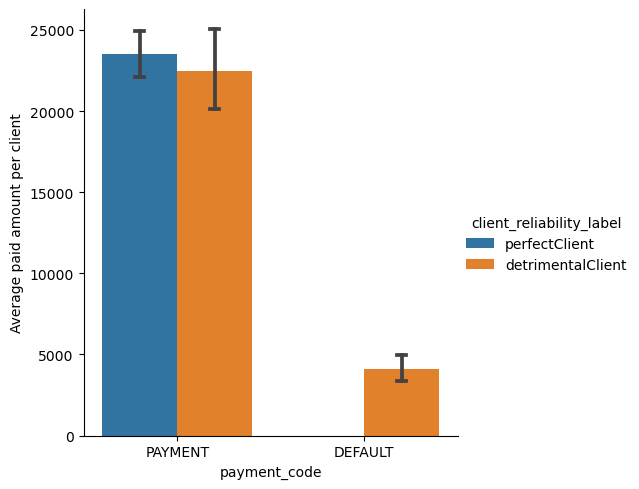

In [23]:
# Are detrimental clients paying less than perfect customers?
# Include all possible outliers:
sns.catplot(data=merged.groupby(['client_id','client_reliability_label','payment_code']).sum().reset_index()[::-1],x='payment_code',y='payment_amt',hue='client_reliability_label',capsize=0.05,dodge=True,kind='bar')
plt.ylabel('Average paid amount per client')
# Ans: not really

In [24]:
merged.groupby(['client_id','client_reliability_label']).sum().reset_index()

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/3305476278.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged.groupby(['client_id','client_reliability_label']).sum().reset_index()


,client_id,client_reliability_label,transaction_id,contract_id,transaction_date,payment_amt,year,month,day,weekday,entity_year_established,client_reliability,count
0,1,perfectClient,284333,16686,27383200266,9016.68,36318,122,406,72,36108,18.0,18
1,2,perfectClient,175964,10944,12231479278,25950.03,16144,46,170,32,16008,8.0,8
2,3,perfectClient,259186,16776,30352373264,4261.68,40352,124,438,72,40040,20.0,20
3,4,perfectClient,277113,17512,33376849439,8016.56,44386,144,562,68,44154,22.0,22
4,5,perfectClient,10233,3258,9007937524,5211.69,12102,46,48,14,12042,6.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,1277,perfectClient,98900,6392,6127231036,21731.73,8072,28,66,16,8016,4.0,4
1277,1278,perfectClient,50279,3262,3064565774,9999.98,4036,14,44,12,4014,2.0,2
1278,1279,perfectClient,100388,6432,6128267708,108658.32,8072,28,78,14,8068,4.0,4
1279,1280,perfectClient,99572,6412,6127576648,21731.73,8072,28,70,6,8064,4.0,4


/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/3528729216.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='client_reliability_label',y='payment_amt',capsize=0.05,dodge=True,kind='bar',data=merged[merged['payment_code'] == 'PAYMENT'].groupby(['client_id','client_reliability_label']).mean().reset_index()[::-1])


Text(-3.9305555555555554, 0.5, 'Average paid amount per client')

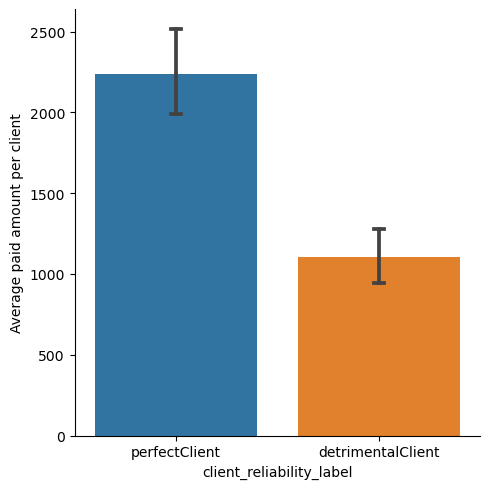

In [62]:
# Are detrimental clients paying less than perfect customers?
# Include all possible outliers:
sns.catplot(x='client_reliability_label',y='payment_amt',capsize=0.05,dodge=True,kind='bar',data=merged[merged['payment_code'] == 'PAYMENT'].groupby(['client_id','client_reliability_label']).mean().reset_index()[::-1])
plt.ylabel('Average paid amount per client')

In [49]:
merged.head(2)

,transaction_id,contract_id,client_id,transaction_date,payment_amt,payment_code,transaction_date_ISO,year,month,month_name,...,weekday,weekday_name,transaction_date_ISO_AU,entity_type,entity_year_established,client_reliability,client_reliability_label,yearMonth,count,days_elapsed
0,8322,927,1,1511370496,5050.04,PAYMENT,2017-11-22 17:08:16,2017,11,November,...,2,Wednesday,2017-11-23 04:08:16,Other Partnership,2006,1.0,perfectClient,2017-11,1,NaN
1,8323,927,1,1511370496,50.00,PAYMENT,2017-11-22 17:08:16,2017,11,November,...,2,Wednesday,2017-11-23 04:08:16,Other Partnership,2006,1.0,perfectClient,2017-11,1,NaN


/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/3795701316.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='client_reliability_label',y='payment_amt',capsize=0.05,dodge=True,kind='bar',data=merged[merged['payment_code'] == 'PAYMENT'].groupby('client_reliability_label').mean().reset_index()[::-1])


Text(-3.9305555555555554, 0.5, 'Average paid amount per reliability label')

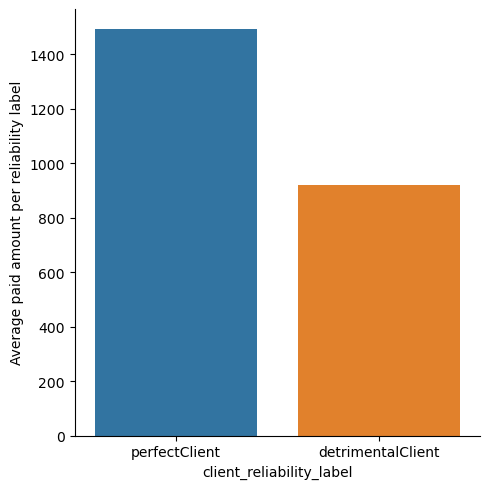

In [52]:
# Are detrimental clients paying less than perfect customers?
# Include all possible outliers:
sns.catplot(x='client_reliability_label',y='payment_amt',capsize=0.05,dodge=True,kind='bar',data=merged[merged['payment_code'] == 'PAYMENT'].groupby('client_reliability_label').mean().reset_index()[::-1])
plt.ylabel('Average paid amount per reliability label')

# CANNOT BE DONE


/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/1313376117.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='yearMonth',y='payment_amt',hue='client_reliability_label',capsize=0.05,dodge=True,ci=95,kind='bar',data=merged.groupby(['client_id','client_reliability_label','yearMonth']).sum().reset_index().sort_values('yearMonth')[::-1])
/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/1313376117.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.catplot(x='yearMonth',y='payment_amt',hue='client_reliability_label',capsize=0.05,dodge=True,ci=95,kind='bar',data=merged.groupby(['client_id','client_reliability_label','yearMonth']).sum().reset_index().sort_values('yearMonth')[::-1])


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, '2018-7'),
  Text(1, 0, '2018-6'),
  Text(2, 0, '2018-5'),
  Text(3, 0, '2018-4'),
  Text(4, 0, '2018-3'),
  Text(5, 0, '2018-2'),
  Text(6, 0, '2018-1'),
  Text(7, 0, '2017-9'),
  Text(8, 0, '2017-8'),
  Text(9, 0, '2017-7'),
  Text(10, 0, '2017-12'),
  Text(11, 0, '2017-11'),
  Text(12, 0, '2017-10')])

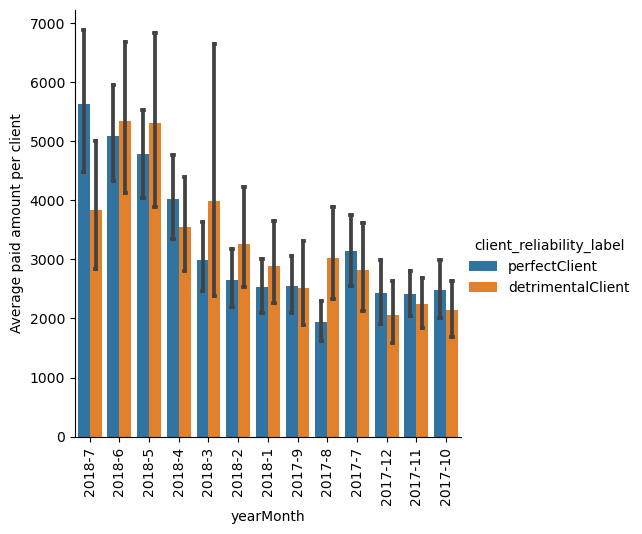

In [26]:
# Are detrimental clients paying less than perfect customers per month?
# Include all possible outliers:
sns.catplot(x='yearMonth',y='payment_amt',hue='client_reliability_label',capsize=0.05,dodge=True,ci=95,kind='bar',data=merged.groupby(['client_id','client_reliability_label','yearMonth']).sum().reset_index().sort_values('yearMonth')[::-1])
plt.ylabel('Average paid amount per client')
plt.xticks(rotation=90)
# Ans: not really

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/3657163436.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='weekday_name',y='payment_amt',hue='client_reliability_label',capsize=0.05,dodge=True,kind='bar',data=merged.groupby(['client_id','client_reliability_label','weekday_name']).sum().reset_index().sort_values('weekday_name'))


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday')])

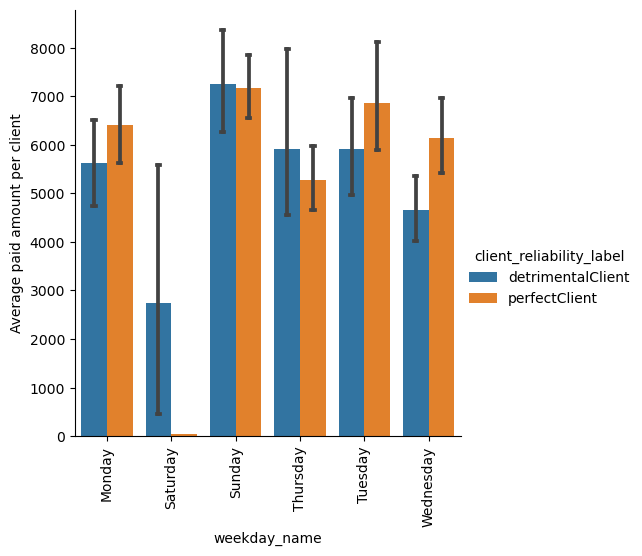

In [27]:
# Are detrimental clients paying less than perfect customers per weekday?
# Include all possible outliers:
sns.catplot(x='weekday_name',y='payment_amt',hue='client_reliability_label',capsize=0.05,dodge=True,kind='bar',data=merged.groupby(['client_id','client_reliability_label','weekday_name']).sum().reset_index().sort_values('weekday_name'))
plt.ylabel('Average paid amount per client')
plt.xticks(rotation=90)
# Ans: Invoices sent on Saturdays are not being paid

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Saturday'),
  Text(2, 0, 'Sunday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Tuesday'),
  Text(5, 0, 'Wednesday')])

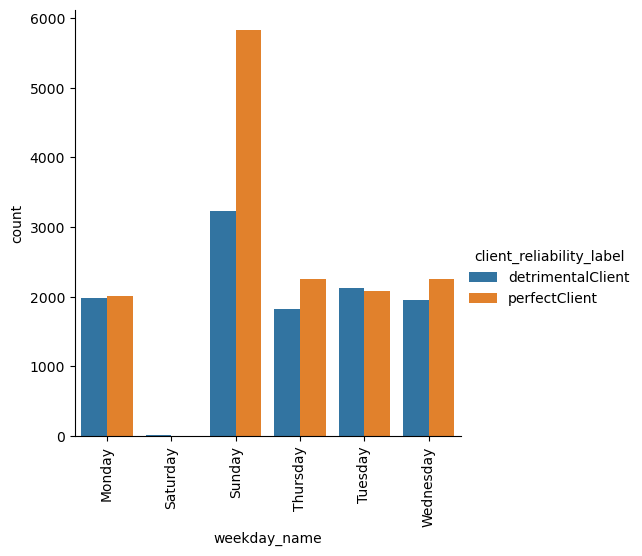

In [28]:
# Are detrimental clients paying less than perfect customers per weekday?
# Include all possible outliers:
sns.catplot(x='weekday_name',y='count',hue='client_reliability_label',capsize=0.05,dodge=True,kind='bar',data=merged.groupby(['weekday_name','client_reliability_label']).count().reset_index())
# plt.ylabel('Average paid amount per client')
plt.xticks(rotation=90)
# Ans: Invoices sent on Saturdays are not being paid

In [29]:
merged = merged.sort_values(['client_id','transaction_date']).reset_index(drop=True)
# Ordered clients:
clients = pd.unique(merged.client_id)

days_elapsed = []

for client in clients:

    days_elapsed.append(np.array(merged[merged['client_id'] == client]['transaction_date_ISO'].diff().dt.days))

days_elapsed_=[]
for i in range(len(days_elapsed)):

    for j in range(len(days_elapsed[i])):
        days_elapsed_.append(days_elapsed[i][j])

merged['days_elapsed'] = days_elapsed_


In [30]:
merged['days_elapsed'] = merged['days_elapsed'].replace(0,np.nan)

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/3080905444.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='client_reliability_label',y='days_elapsed',kind='bar',capsize=0.05,data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label']).mean().reset_index())


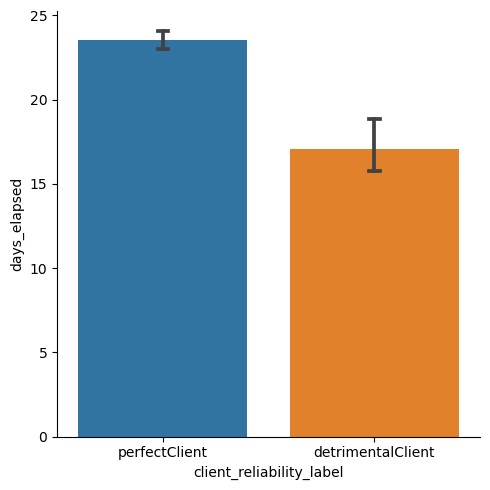

In [31]:
sns.catplot(x='client_reliability_label',y='days_elapsed',kind='bar',capsize=0.05,data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label']).mean().reset_index())

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/184344155.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='client_reliability_label',y='days_elapsed',kind='box',data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label']).mean().reset_index())


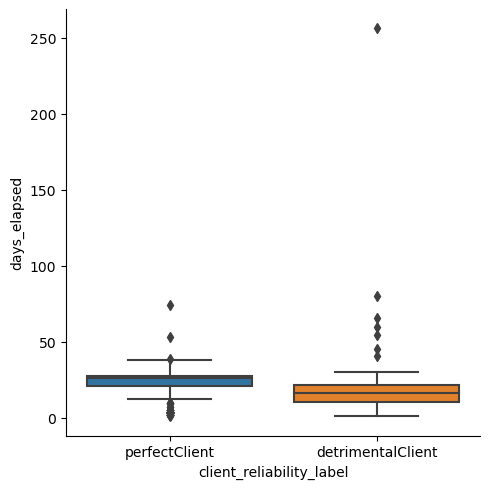

In [32]:
# Have a look for outliers:
sns.catplot(x='client_reliability_label',y='days_elapsed',kind='box',data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label']).mean().reset_index())

# In this case, it appears to have outliers. In such case, it will just make the assumption a little less significant. Not contributing to changes in the analysis.

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/277646058.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='client_reliability_label',y='days_elapsed',hue='year',kind='bar',capsize=0.05,data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label','year']).mean().reset_index())


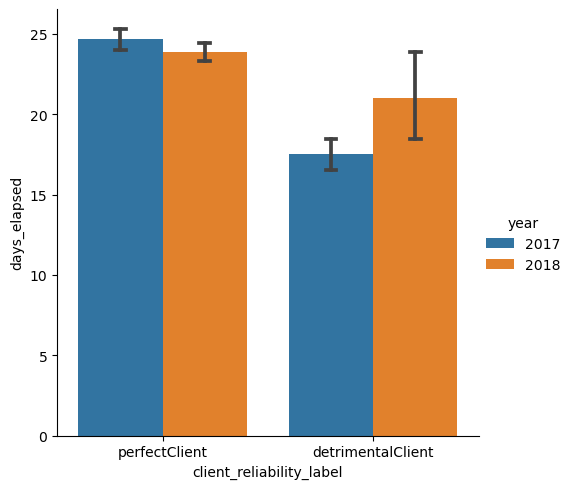

In [33]:
sns.catplot(x='client_reliability_label',y='days_elapsed',hue='year',kind='bar',capsize=0.05,data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label','year']).mean().reset_index())

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/1282514478.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.catplot(x='client_reliability_label',y='days_elapsed',hue='year',kind='box',data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label','year']).mean().reset_index())


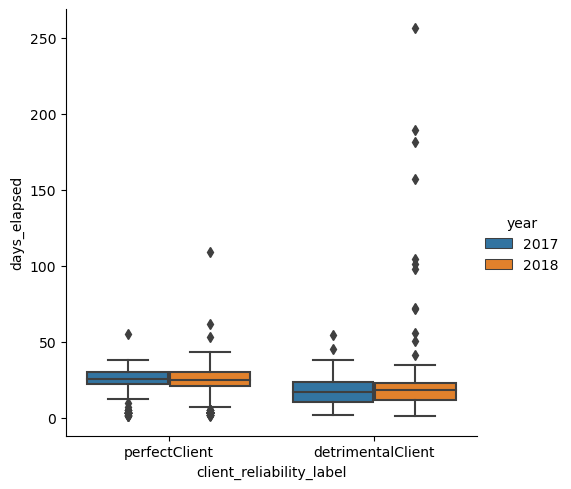

In [34]:
# Have a look for outliers:
sns.catplot(x='client_reliability_label',y='days_elapsed',hue='year',kind='box',data=merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label','year']).mean().reset_index())

# In this case, it appears to have outliers. In such case, it will just make the assumption a little less significant. Not contributing to changes in the analysis.

In [35]:
# Remove outliers by the interquartile range method:
to_removeOutliers = merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label','year']).mean().reset_index()[['client_id','client_reliability_label','days_elapsed','year']]

# Separate perfectClient and detrimentalClient in separate arrays:
# perfectCLient:
to_removeOutliers_perfectClient = to_removeOutliers[to_removeOutliers['client_reliability_label'] == 'perfectClient']

p75,p25 = np.percentile(to_removeOutliers_perfectClient.days_elapsed,[75,25])
pIQR = p75-p25

to_removeOutliers_perfectClient = to_removeOutliers_perfectClient[to_removeOutliers_perfectClient['days_elapsed'] < (p75 + (1.5*pIQR))]
to_removeOutliers_perfectClient = to_removeOutliers_perfectClient[to_removeOutliers_perfectClient['days_elapsed'] > (p25 - (1.5*pIQR))].reset_index(drop=True)

#########

to_removeOutliers_detrimentalClient = to_removeOutliers[to_removeOutliers['client_reliability_label'] == 'detrimentalClient']

d75,d25 = np.percentile(to_removeOutliers_detrimentalClient.days_elapsed,[75,25])
dIQR = p75-p25

to_removeOutliers_detrimentalClient = to_removeOutliers_detrimentalClient[to_removeOutliers_detrimentalClient['days_elapsed'] < (d75 + (1.5*dIQR))]
to_removeOutliers_detrimentalClient = to_removeOutliers_detrimentalClient[to_removeOutliers_detrimentalClient['days_elapsed'] > (d25 - (1.5*dIQR))].reset_index(drop=True)

to_removeOutliers = pd.concat([to_removeOutliers_perfectClient,to_removeOutliers_detrimentalClient])

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/2914149125.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  to_removeOutliers = merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label','year']).mean().reset_index()[['client_id','client_reliability_label','days_elapsed','year']]


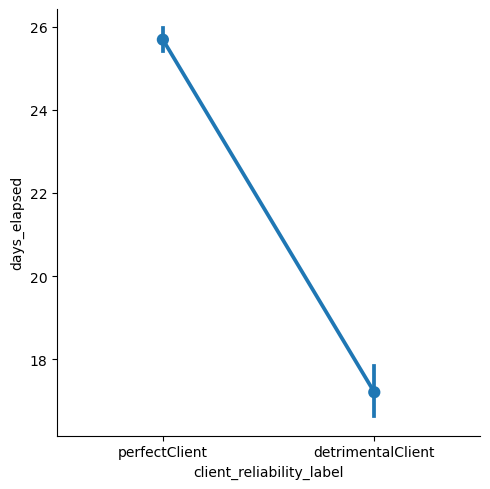

In [36]:
sns.catplot(x='client_reliability_label',y='days_elapsed',kind='point',data=to_removeOutliers)


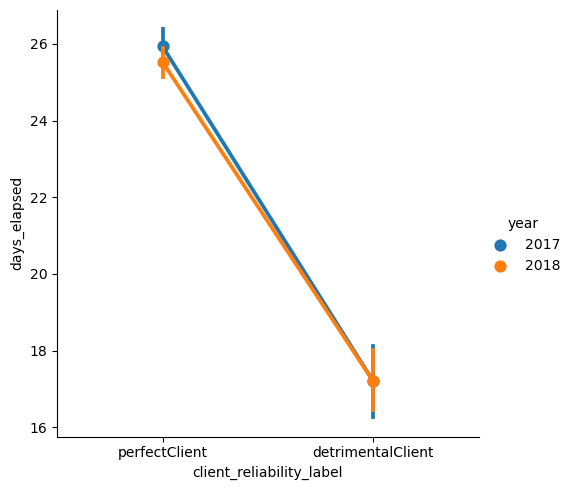

In [37]:
sns.catplot(x='client_reliability_label',y='days_elapsed',hue='year',kind='point',data=to_removeOutliers)


In [38]:
# Test the normality of the distributions:

In [39]:
to_test_normality = to_removeOutliers#merged.dropna(subset='days_elapsed').groupby(['client_id','client_reliability_label']).mean().reset_index()

from scipy import stats

res = stats.normaltest(to_test_normality[to_test_normality['client_reliability_label'] == 'perfectClient'].days_elapsed)
print('{},{}'.format(res.statistic,res.pvalue))

# Ans: The data does not follow normal distribution, and so, t-tests would not suffice the analysis

62.79173367375477,2.3171186788270643e-14


In [40]:
# Perform Mann-Whitney U test:
from scipy.stats import mannwhitneyu

perfectClient = to_test_normality[to_test_normality['client_reliability_label'] == 'perfectClient'].days_elapsed
detrimentalClient = to_test_normality[to_test_normality['client_reliability_label'] == 'detrimentalClient'].days_elapsed

# Perform the Mann-Whitney U test
statistic, p_value = mannwhitneyu(perfectClient, detrimentalClient)

# Output the results
print("Mann-Whitney U statistic:", statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two samples.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two samples.")


Mann-Whitney U statistic: 564355.5
p-value: 4.674729332159075e-101
Reject the null hypothesis: There is a significant difference between the two samples.


# Ans: Yes, clients that pay too often have the tendency to skip payments.

In [41]:
# Is that because they have too many contracts?

Text(0.5, 1.0, 'Number of contracts')

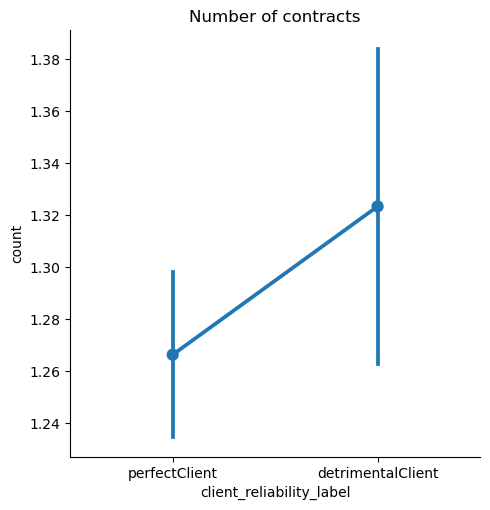

In [44]:
sns.catplot(x='client_reliability_label',y='count',kind='point',data=merged[['client_id','client_reliability_label','contract_id','count']].drop_duplicates(subset='contract_id',keep='first').groupby(['client_id','client_reliability_label']).count().reset_index())
plt.title('Number of contracts')
# Ans: No, it is not because of the number of contracts

In [59]:
# Save to create dashboards:

to_removeOutliers.to_csv('Database/processed_withoutDaysElapsedOutliers.csv',index=False)
merged.to_csv('Database/processed.csv',index=False)

merged[merged['payment_code'] == 'PAYMENT'].groupby(['client_id','client_reliability_label']).mean().reset_index().to_csv('AvgPaidPerClient.csv',index=False)
merged[merged['payment_code'] == 'PAYMENT'].groupby(['client_id','client_reliability_label']).sum().reset_index().to_csv('TotalPaidPerClient.csv',index=False)

/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/2196838620.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged[merged['payment_code'] == 'PAYMENT'].groupby(['client_id','client_reliability_label']).mean().reset_index().to_csv('AvgPaidPerClient.csv',index=False)
/var/folders/_c/vmr77j917m1gzfv31r2nrpxm0000gn/T/ipykernel_1244/2196838620.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged[merged['payment_code'] == 'PAYMENT'].groupby(['client_id','client_reliability_label']).sum().reset_index().to_csv('TotalPaidPerClient.csv',index=False)


--------

--------

--------

--------

# Test Area

c:\Users\VictorVarela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Other Partnership'),
  Text(1, 0, 'Australian Private Company'),
  Text(2, 0, 'Individual/Sole Trader'),
  Text(3, 0, 'Family Partnership'),
  Text(4, 0, 'Australian Public Company'),
  Text(5, 0, 'Discretionary Trading Trust'),
  Text(6, 0, 'Discretionary Investment Trust'),
  Text(7, 0, 'Fixed Unit Trust'),
  Text(8, 0, 'Hybrid Trust'),
  Text(9, 0, 'Australian Proprietary Company')])

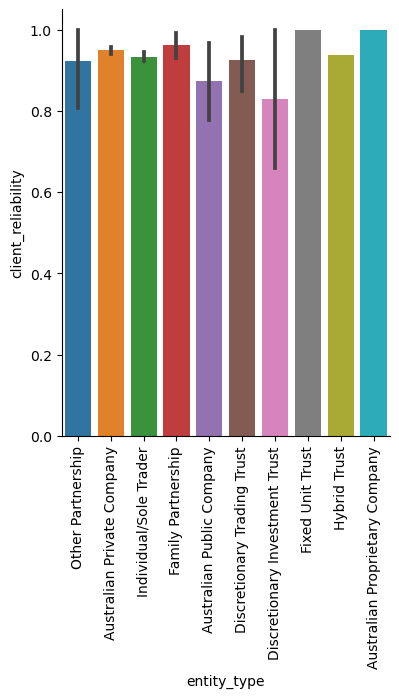

In [ ]:
# Are any of the entity_types more default prone?
sns.catplot('entity_type','client_reliability',kind='bar',data=merged.groupby(['client_id','entity_type']).mean().reset_index())
plt.xticks(rotation=90)
# Ans: Nothing that is statistically significant

c:\Users\VictorVarela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Other Partnership'),
  Text(1, 0, 'Australian Private Company'),
  Text(2, 0, 'Individual/Sole Trader'),
  Text(3, 0, 'Family Partnership'),
  Text(4, 0, 'Australian Public Company'),
  Text(5, 0, 'Discretionary Trading Trust'),
  Text(6, 0, 'Discretionary Investment Trust'),
  Text(7, 0, 'Fixed Unit Trust'),
  Text(8, 0, 'Hybrid Trust'),
  Text(9, 0, 'Australian Proprietary Company')])

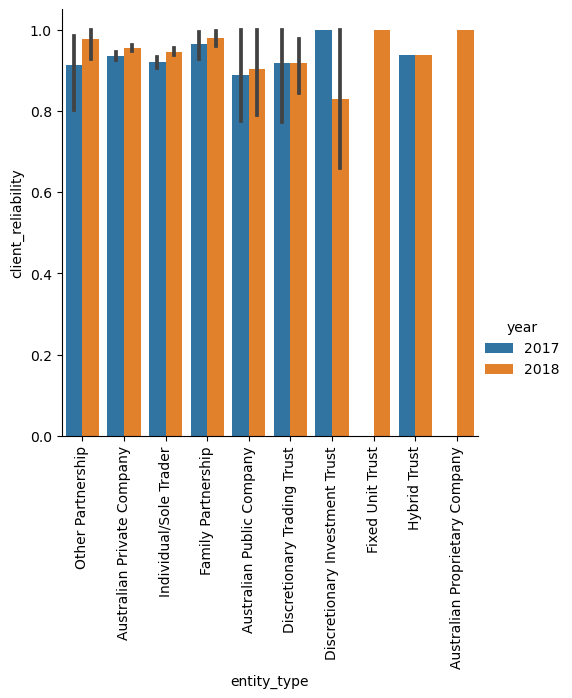

In [ ]:
# Are any of the entity_types more default prone 2018 or 2017?
sns.catplot('entity_type','client_reliability',hue='year',kind='bar',data=merged.groupby(['client_id','entity_type','year']).mean().reset_index())
plt.xticks(rotation=90)
# Ans: Nothing statistically significant

c:\Users\VictorVarela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1999'),
  Text(1, 0, '2000'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018')])

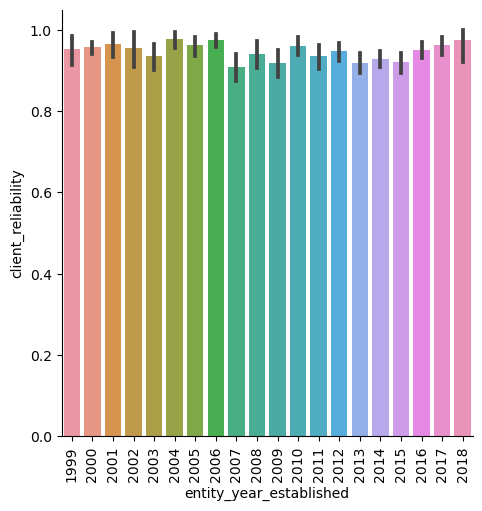

In [ ]:
# Are any of the entity_year_established more default prone?
sns.catplot('entity_year_established','client_reliability',kind='bar',data=merged.groupby(['client_id','entity_year_established']).mean().reset_index())
plt.xticks(rotation=90)
# Ans: Nothing that is statistically significant

#### What if we only observe default-prone customers?


In [ ]:
merged_defaultprone = merged[merged['client_reliability_label']!= 'perfectClient'].reset_index(drop=True)
merged_perfectClients = merged[merged['client_reliability_label']== 'perfectClient'].reset_index(drop=True)

In [ ]:
# How many clients are default prone?
print('How many default prone clients?')
print(len(pd.unique(merged_defaultprone.client_id)))

print('How many perfect clients?')
print(len(pd.unique(merged_perfectClients.client_id)))

How many default prone clients?
365
How many perfect clients?
916


c:\Users\VictorVarela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(49.23499652777777, 0.5, 'Average paid amount per client')

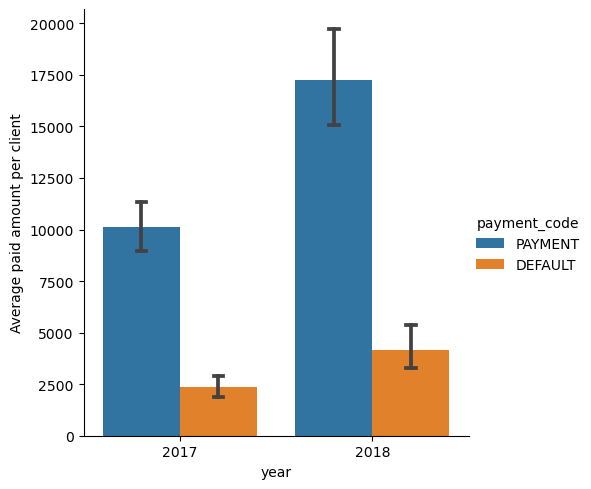

In [ ]:
# How much money are clients paying vs not paying per year?
# Include all possible outliers:
sns.catplot('year','payment_amt',hue='payment_code',capsize=0.05,dodge=True,kind='bar',data=merged_defaultprone.groupby(['client_id','payment_code','year']).sum().reset_index()[::-1])
plt.ylabel('Average paid amount per client')

c:\Users\VictorVarela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Australian Private Company'),
  Text(1, 0, 'Individual/Sole Trader'),
  Text(2, 0, 'Family Partnership'),
  Text(3, 0, 'Australian Public Company'),
  Text(4, 0, 'Discretionary Trading Trust'),
  Text(5, 0, 'Other Partnership'),
  Text(6, 0, 'Hybrid Trust'),
  Text(7, 0, 'Discretionary Investment Trust')])

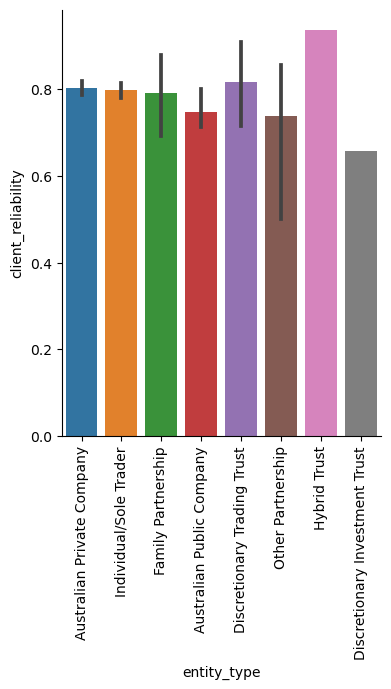

In [ ]:
# Are any of the entity_types more default prone?
sns.catplot('entity_type','client_reliability',kind='bar',data=merged_defaultprone.groupby(['client_id','entity_type']).mean().reset_index())
plt.xticks(rotation=90)
# Ans: Nothing that is statistically significant

c:\Users\VictorVarela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Australian Private Company'),
  Text(1, 0, 'Individual/Sole Trader'),
  Text(2, 0, 'Family Partnership'),
  Text(3, 0, 'Australian Public Company'),
  Text(4, 0, 'Discretionary Trading Trust'),
  Text(5, 0, 'Other Partnership'),
  Text(6, 0, 'Hybrid Trust'),
  Text(7, 0, 'Discretionary Investment Trust')])

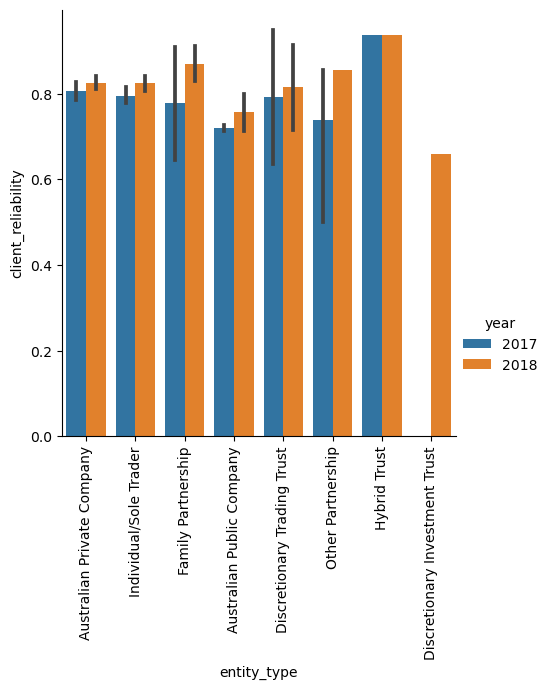

In [ ]:
# Are any of the entity_types more default prone 2018 or 2017?
sns.catplot('entity_type','client_reliability',hue='year',kind='bar',data=merged_defaultprone.groupby(['client_id','entity_type','year']).mean().reset_index())
plt.xticks(rotation=90)
# Ans: Nothing that is statistically significant

c:\Users\VictorVarela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, '1999'),
  Text(1, 0, '2000'),
  Text(2, 0, '2001'),
  Text(3, 0, '2002'),
  Text(4, 0, '2003'),
  Text(5, 0, '2004'),
  Text(6, 0, '2005'),
  Text(7, 0, '2006'),
  Text(8, 0, '2007'),
  Text(9, 0, '2008'),
  Text(10, 0, '2009'),
  Text(11, 0, '2010'),
  Text(12, 0, '2011'),
  Text(13, 0, '2012'),
  Text(14, 0, '2013'),
  Text(15, 0, '2014'),
  Text(16, 0, '2015'),
  Text(17, 0, '2016'),
  Text(18, 0, '2017'),
  Text(19, 0, '2018')])

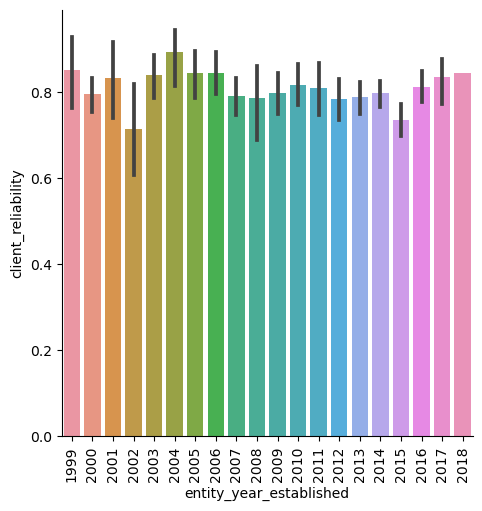

In [ ]:
# Are any of the entity_year_established more default prone?
sns.catplot('entity_year_established','client_reliability',kind='bar',data=merged_defaultprone.groupby(['client_id','entity_year_established']).mean().reset_index())
plt.xticks(rotation=90)
# Ans: Nothing that is statistically significant

In [ ]:
from pandasql import sqldf

ModuleNotFoundError: No module named 'pandasql'

In [ ]:
!conda install pandasql

^C
